
<h2><big>Завдання</big></h2>
<p><h2><small>Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).</p>
<p>Побудувати графік розкиду в групах.</p>
<p>Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.</p>
<p>Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.</p>
<p>Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.</h2></small></p>


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({
    "Кількість замовлень до карантину":     [123, 130, 131, 145, 128, 153, 165, 110, 144, 159],
    "Кількість замовлень під час карантину":[111, 122, 128, 149, 134, 141, 153, 126, 119, 117],
    "Кількість замовлень на свята":         [152, 166, 176, 173, 145, 198, 171, 158, 162, 184]
})
data.index.name = 'n'
n = data.shape[0]

data

,Кількість замовлень до карантину,Кількість замовлень під час карантину,Кількість замовлень на свята
n,,,
0,123,111,152
1,130,122,166
2,131,128,176
3,145,149,173
4,128,134,145
5,153,141,198
6,165,153,171
7,110,126,158
8,144,119,162


In [8]:
sum1=sum(data.iloc[:,0]/n)
sum2=sum(data.iloc[:,1]/n)
sum3=sum(data.iloc[:,2]/n)

sd1=data.iloc[:,0].std()
sd2=data.iloc[:,1].std()
sd3=data.iloc[:,2].std()

new_df = pd.DataFrame({
    "Кількість замовлень до карантину":[123, 130, 131, 145, 128, 153, 165, 110, 144, 159],
    "Кількість замовлень під час карантину":[111, 122, 128, 149, 134, 141, 153, 126, 119, 117],
    "Кількість замовлень на свята":[152, 166, 176, 173, 145, 198, 171, 158, 162, 184]
})

new_df.index.name = 'n'
new_df.loc["Середнє"] = [sum1,sum2,sum3]
new_df.loc["Стандартне відхилення"] = [sd1,sd2,sd3]

new_df

,Кількість замовлень до карантину,Кількість замовлень під час карантину,Кількість замовлень на свята
n,,,
0,123.000000,111.000000,152.000000
1,130.000000,122.000000,166.000000
2,131.000000,128.000000,176.000000
3,145.000000,149.000000,173.000000
4,128.000000,134.000000,145.000000
5,153.000000,141.000000,198.000000
6,165.000000,153.000000,171.000000
7,110.000000,126.000000,158.000000
8,144.000000,119.000000,162.000000


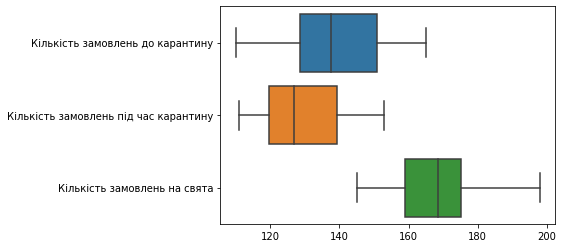

In [10]:
sns.boxplot(data=data, orient='h')

In [21]:
def dispersia(data):
    n = data.shape[0]
    T1 = sum(data.iloc[:,0])
    T2 = sum(data.iloc[:,1])
    T3 = sum(data.iloc[:,2])
    Tsum2 = pow(T1, 2) + pow(T2, 2) + pow(T3, 2)
    c = data.shape[1]
    N = n * c
    sumXi2 = (T1 + T2 + T3) ** 2
    const = sumXi2 / N
    xi2 = 0
    sumxi = 0
    
    for i in range (c):
        for j in range(len(data.iloc[:,i-1])):
            sumxi += (data.iloc[j][i])**2
    
    SSfact = Tsum2 / n - const
    SSzagal = sumxi - const
    SSvipadk = SSzagal - SSfact
    
    dfact = c - 1 
    dzagal = N - 1 
    dvipadk = dzagal - dfact
    
    MSfact = SSfact / dfact
    MSvipadk = SSvipadk / dvipadk
    
    Femp = MSfact / MSvipadk
    
    print("Внутрішньогрупова дисперсія: ", SSfact)
    print("Загальногрупова дисперсія: ", SSzagal)
    print("Випадкова (залишкова) величина: ", SSvipadk)
    print("d фактичне: ", dfact)
    print("d загальне: ", dzagal)
    print("d випадкове: ", dvipadk)
    print("MS фактичне: ", MSfact)
    print("MS випадкове: ", MSvipadk)
    print("F емпіричне: ", Femp)
    
    Fkrit = pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx").iloc[dvipadk,dfact]
    print("Критичне значення F по таблиці критичних значень: ", Fkrit)
    
    if(Femp >= Fkrit):
        result = "Нульова гіпотеза про рівність середніх відхиляється, тобто середні незалежних груп відмінні"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
            

    return result

In [22]:
dispersia(data)

Внутрішньогрупова дисперсія:  8139.266666666721
Загальногрупова дисперсія:  14773.366666666698
Випадкова (залишкова) величина:  6634.099999999977
d фактичне:  2
d загальне:  29
d випадкове:  27
MS фактичне:  4069.6333333333605
MS випадкове:  245.70740740740655
F емпіричне:  16.56292488807843
Критичне значення F по таблиці критичних значень:  3.3


'Нульова гіпотеза про рівність середніх відхиляється, тобто середні незалежних груп відмінні'